In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

sys.path.append('../../src')
import analyze
import raybay

In [2]:
# Load treatment plan results
approved = np.load('approved/res.pkl', allow_pickle=True)
default = np.load('default/res.pkl', allow_pickle=True)
result = np.load('grid/res_grid_1.pkl', allow_pickle=True)

In [3]:
# Clinical goals
result.goal_df

Roi     Type GoalCriteria  AcceptanceLevel  ParameterValue
0   Chestwall_L   MaxDvh       AtMost             3000            2.04
1          D2cm  MaxDose       AtMost             2400             NaN
2     Esophagus   MaxDvh       AtMost             1880           16.91
3         Lungs   MaxDvh       AtMost             1160           29.19
4         Lungs   MaxDvh       AtMost             1240           19.46
5           PTV   MinDvh      AtLeast             4800           95.00
6           PTV  MaxDose       AtMost             8000             NaN
7           Rib   MaxDvh       AtMost             3200            0.27
8           Rib  MaxDose       AtMost             4000             NaN
9   SpinalCanal   MaxDvh       AtMost             1360            2.30
10  SpinalCanal  MaxDose       AtMost             2600             NaN

In [246]:
# Constituent functions
result.func_df = raybay.get_funcs('grid2/funcs.csv')

# This was for the 1D grid search, but now we have Rib MaxDose [0,4000] as well

In [173]:
result.func_df

Roi FunctionType        DoseLevel PercentVolume EudParameterA  \
0   Chestwall_L       MaxDvh             3000          2.04           NaN   
1          D2cm      MaxDose  [700.0, 2400.0]             0           NaN   
2     Esophagus       MaxDvh             1880         16.91           NaN   
3         Lungs       MaxDvh             1160         29.19           NaN   
4         Lungs       MaxDvh             1240         19.46           NaN   
5           PTV       MinDvh             4800            95           NaN   
6           PTV      MaxDose             8000             0           NaN   
7           Rib       MaxDvh             3200          0.27           NaN   
8           Rib      MaxDose    [0.0, 4000.0]             0           NaN   
9   SpinalCanal       MaxDvh             1360           2.3           NaN   
10  SpinalCanal      MaxDose             2600             0           NaN   

   Weight  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1  
10      1

In [443]:
# Load 2D grid search results
# Computed in batches due to connection timing out
goal_dict_1 = np.load('grid2/goal_dict_1.pkl', allow_pickle=True) # (0,0) - (100,2700)
goal_dict_2 = np.load('grid2/goal_dict_2.pkl', allow_pickle=True) # (200,0) - (700,100)
goal_dict_3 = np.load('grid2/goal_dict_3.pkl', allow_pickle=True) # (100,2800) - (100,4000)
goal_dict_4 = np.load('grid2/goal_dict_4.pkl', allow_pickle=True) # (700,0) - (1200,2000)
goal_dict_5 = np.load('grid2/goal_dict_5.pkl', allow_pickle=True) # (1200,2100) - (1200,4000)
goal_dict_6 = np.load('grid2/goal_dict_6.pkl', allow_pickle=True) # (1300,0) - (1500,2200)
goal_dict_7 = np.load('grid2/goal_dict_7.pkl', allow_pickle=True) # (1500,2300) - (1500,4000)
goal_dict_8 = np.load('grid2/goal_dict_8.pkl', allow_pickle=True) # (1600,0) - (2400,4000)

In [444]:
# Create results for (0,0) - (1200,4000)
d2cm = np.arange(0, 2500, 100)
rib = np.arange(0, 4100, 100)
goal_dict = {ii: goal_dict_1[ii].copy() for ii in goal_dict_1}
for ii in goal_dict:
    goal_dict[ii] += goal_dict_3[ii]
    goal_dict[ii] += goal_dict_2[ii][:-2]
    goal_dict[ii] += goal_dict_4[ii]
    goal_dict[ii] += goal_dict_5[ii]
    goal_dict[ii] += goal_dict_6[ii]
    goal_dict[ii] += goal_dict_7[ii]
    goal_dict[ii] += goal_dict_8[ii]
x_iters = [[ii, jj] for ii in d2cm for jj in rib]
[X, Y] = np.meshgrid(d2cm, rib)

In [430]:
# Now what do I want to do with this data?
# - plot parameters vs. flags (need to get from logs)
# - plot parameters vs. goal values
# - plot parameters vs. different utility values

In [445]:
# Read log files to get flags
flag_list_1 = []
f = open('grid2/log_grid_1.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_1.append(flag)
f.close()

flag_list_2 = []
f = open('grid2/log_grid_2.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_2.append(flag)
f.close()

flag_list_3 = []
f = open('grid2/log_grid_3.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_3.append(flag)
f.close()

flag_list_4 = []
f = open('grid2/log_grid_4.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_4.append(flag)
f.close()

flag_list_5 = []
f = open('grid2/log_grid_5.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_5.append(flag)
f.close()

flag_list_6 = []
f = open('grid2/log_grid_6.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_6.append(flag)
f.close()

flag_list_7 = []
f = open('grid2/log_grid_7.txt', 'r')
for line in f:
    flag = int(line.split()[3][:-1])
    flag_list_7.append(flag)
f.close()

flag_list_8 = []
f = open('grid2/log_grid_8.txt', 'r')
for line in f:
    flag = int(line.split()[4][:-1])
    flag_list_8.append(flag)
f.close()

In [446]:
# Compile flag lists
flag_list = flag_list_1.copy()
flag_list += flag_list_3
flag_list += flag_list_2[:-2]
flag_list += flag_list_4
flag_list += flag_list_5
flag_list += flag_list_6
flag_list += flag_list_7
flag_list += flag_list_8

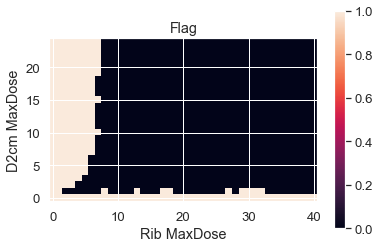

In [447]:
# Flags vs. parameters
Z = np.zeros_like(X)
F = np.ones_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        Z[jj, ii] = flag_list[k]
        F[jj, ii] = 0 if flag_list[k] == 1 else 1
        k += 1
plt.imshow(Z.T, origin='lower')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Flag')
plt.colorbar();

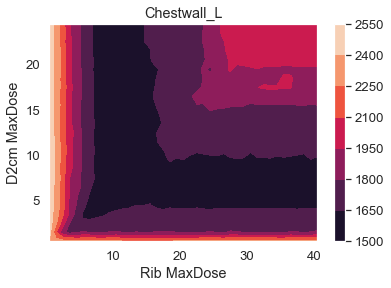

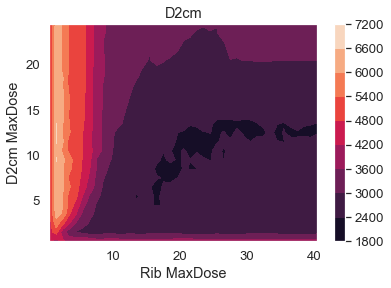

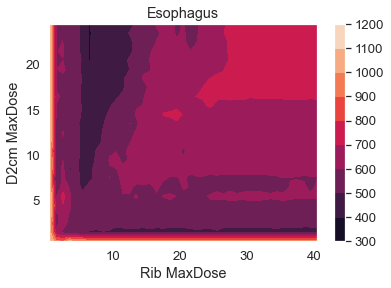

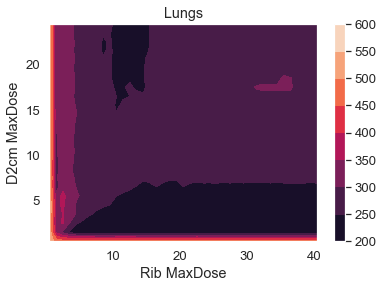

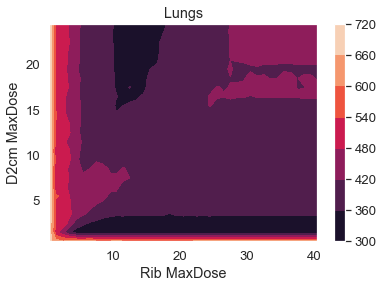

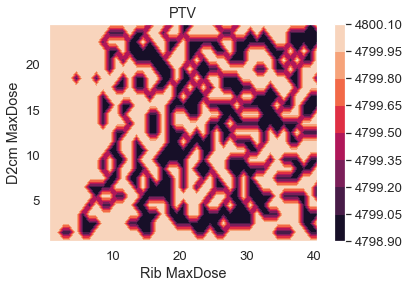

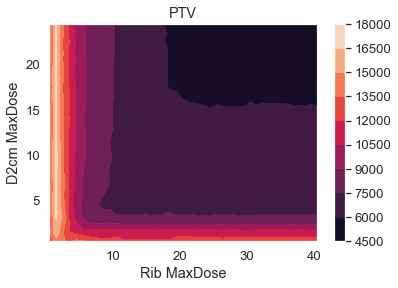

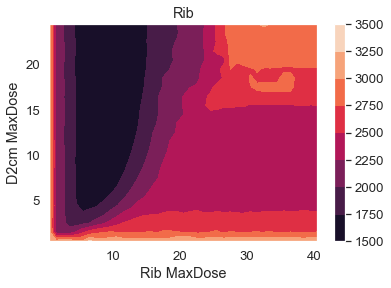

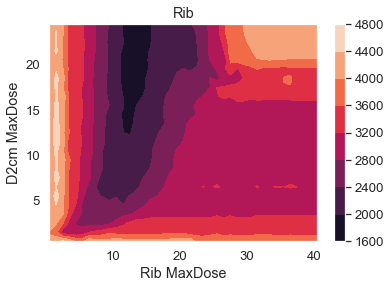

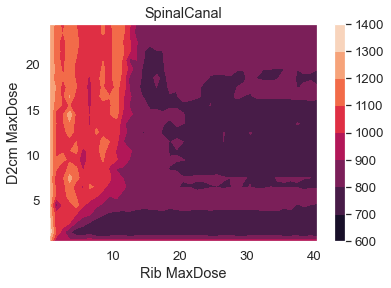

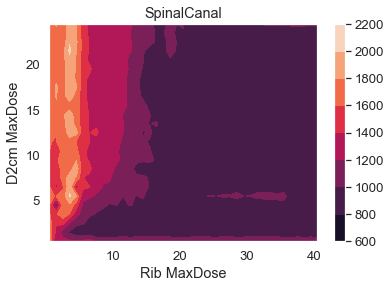

In [448]:
# Goal values vs. parameters
# Maybe put lines around regions that meet goals or don't meet goals
for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            Z[jj, ii] = goal_dict[goal][k]
            k += 1
    plt.figure()
    plt.contourf(Z.T, origin='lower')
    plt.xlabel('Rib MaxDose')
    plt.ylabel('D2cm MaxDose')
    plt.title(result.goal_df.iloc[goal]['Roi'])
    plt.colorbar()

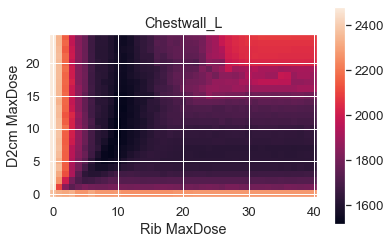

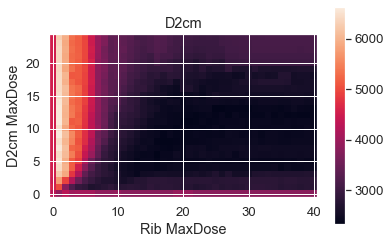

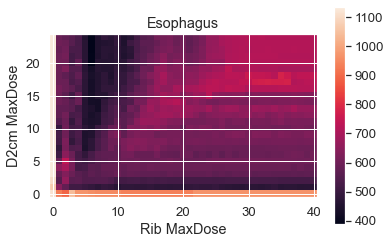

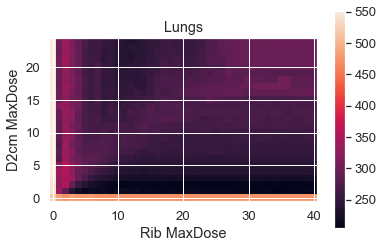

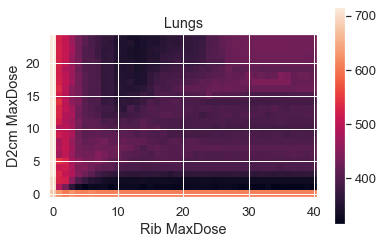

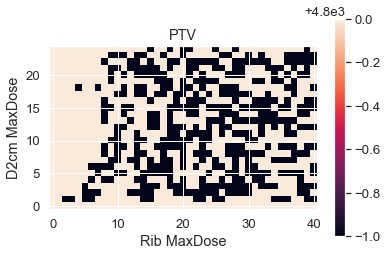

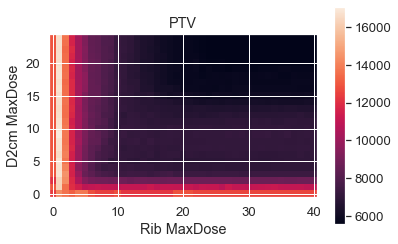

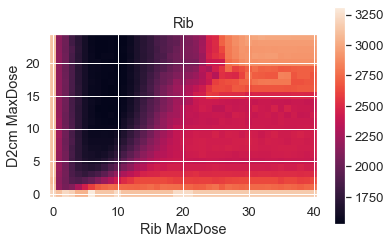

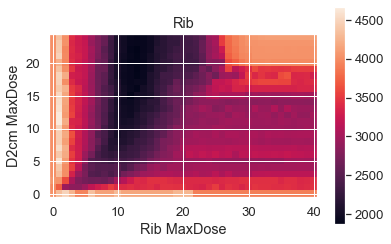

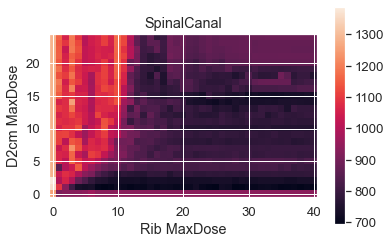

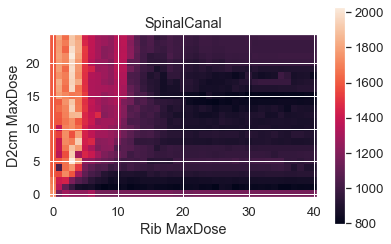

In [449]:
# Goal values vs. parameters
# Maybe put lines around regions that meet goals or don't meet goals
for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            Z[jj, ii] = goal_dict[goal][k]
            k += 1
    plt.figure()
    plt.imshow(Z.T, origin='lower')
    plt.xlabel('Rib MaxDose')
    plt.ylabel('D2cm MaxDose')
    plt.title(result.goal_df.iloc[goal]['Roi'])
    plt.colorbar()

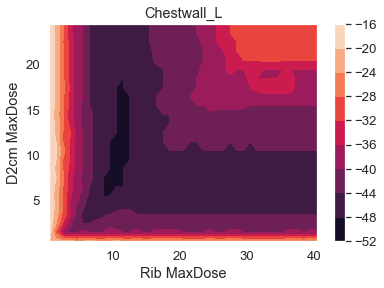

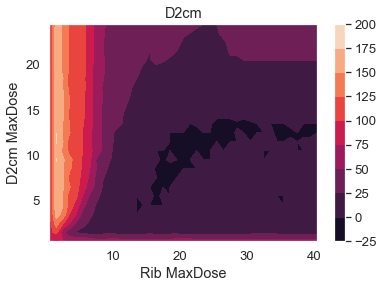

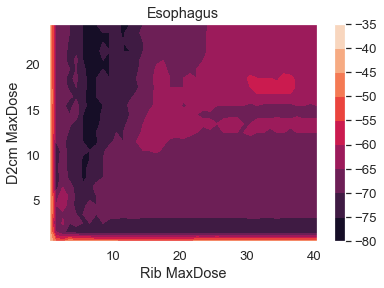

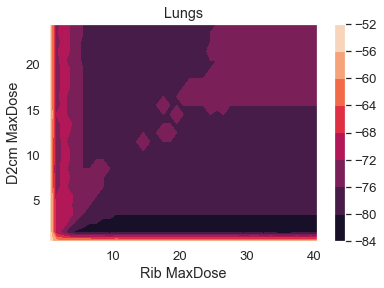

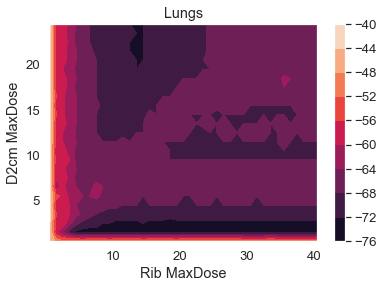

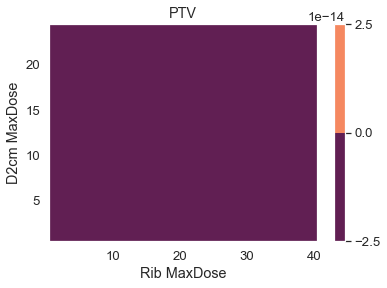

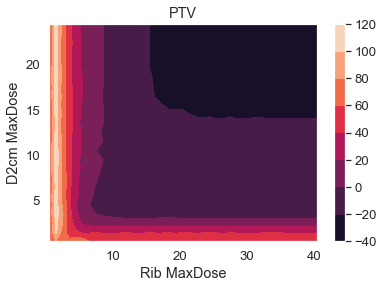

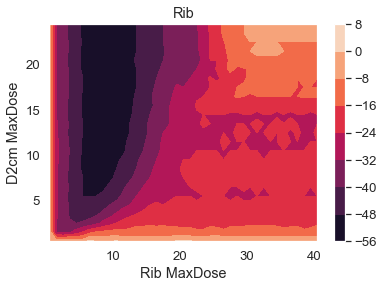

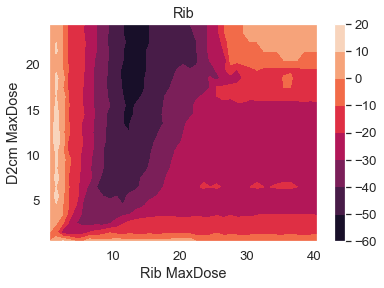

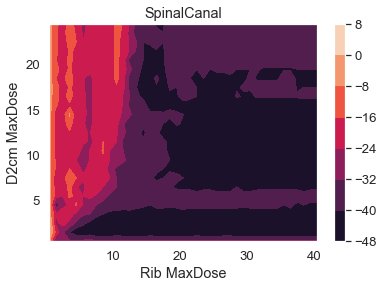

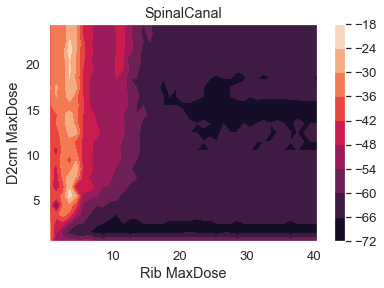

In [450]:
# Percent difference vs. parameters
for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            level = result.goal_df.iloc[goal]['AcceptanceLevel']
            Z[jj, ii] = 100*(goal_dict[goal][k] - level)/level
            k += 1
    plt.figure()
    plt.contourf(Z.T, origin='lower')
    plt.xlabel('Rib MaxDose')
    plt.ylabel('D2cm MaxDose')
    plt.title(result.goal_df.iloc[goal]['Roi'])
    plt.colorbar()

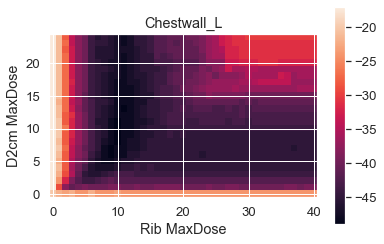

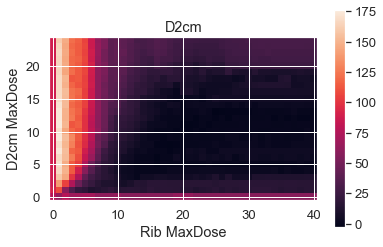

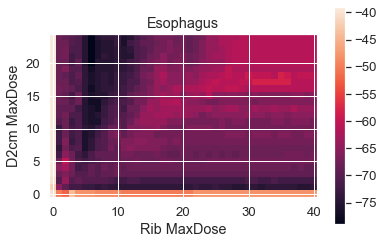

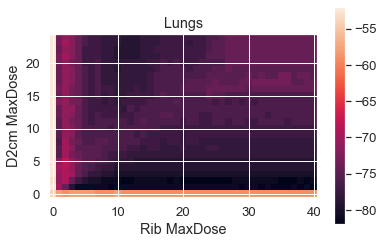

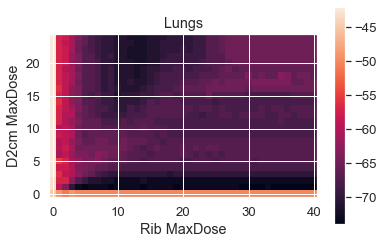

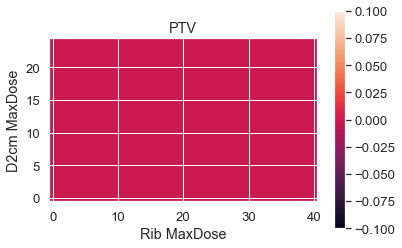

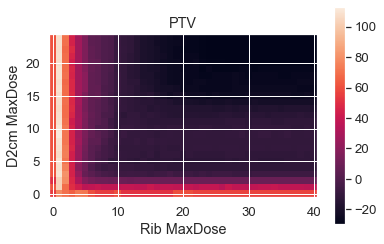

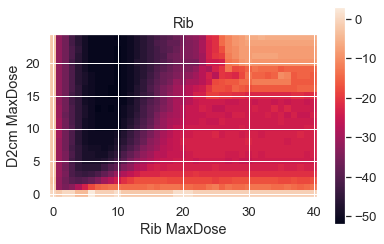

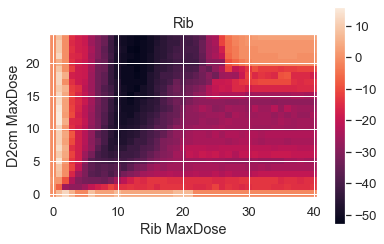

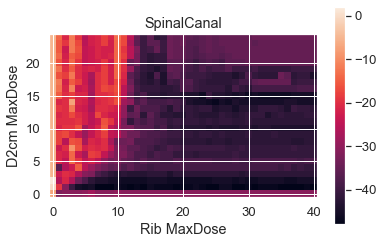

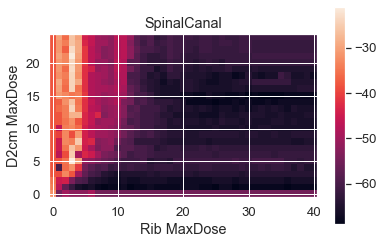

In [451]:
# Percent difference vs. parameters
for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            level = result.goal_df.iloc[goal]['AcceptanceLevel']
            Z[jj, ii] = 100*(goal_dict[goal][k] - level)/level
            k += 1
    plt.figure()
    plt.imshow(Z.T, origin='lower')
    plt.xlabel('Rib MaxDose')
    plt.ylabel('D2cm MaxDose')
    plt.title(result.goal_df.iloc[goal]['Roi'])
    plt.colorbar()

-49 -17
-3 176
-79 -39
-82 -52
-74 -42
0 0
-30 113
-52 3
-53 16
-48 2
-69 -21


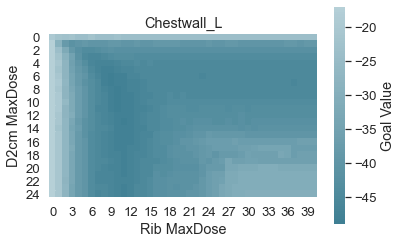

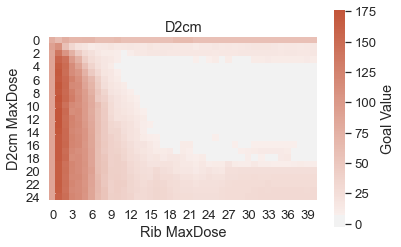

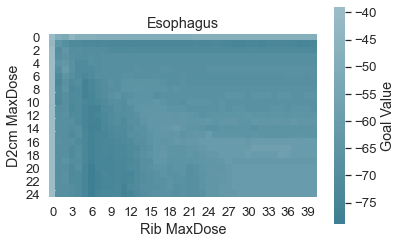

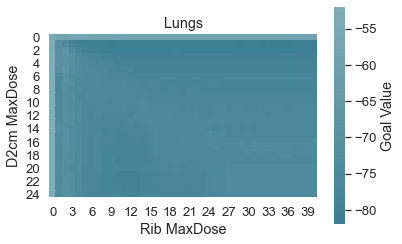

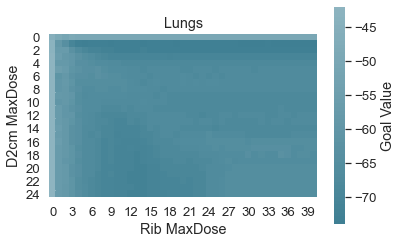

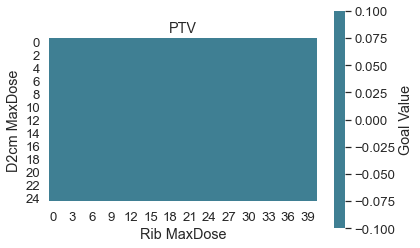

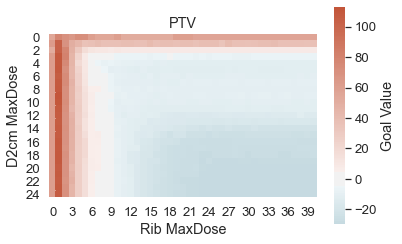

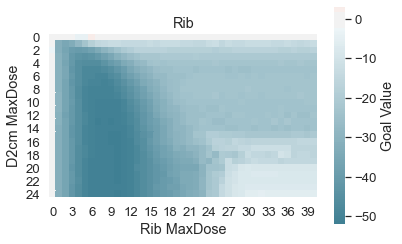

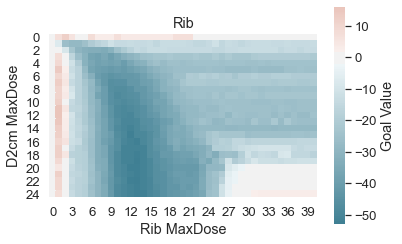

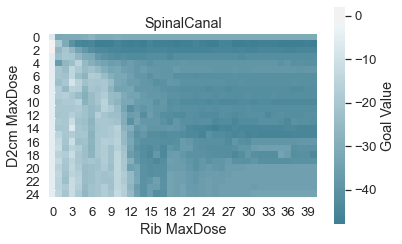

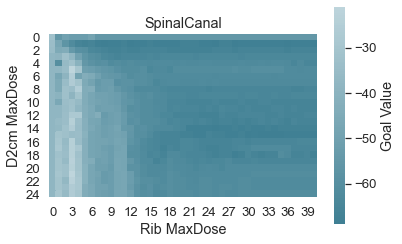

In [604]:
# Percent difference vs. parameters

# Figure out how to flip y direction
# sns also has clutering! clustermap
# use mask with flag!!! mask doesn't work :(

for goal in goal_dict:
    Z = np.zeros_like(X)
    k = 0
    for ii in range(len(d2cm)):
        for jj in range(len(rib)):
            level = result.goal_df.iloc[goal]['AcceptanceLevel']
            Z[jj, ii] = 100*(goal_dict[goal][k] - level)/level
            k += 1
    fig, ax = plt.subplots()
    #sns.heatmap(F.T*Z.T, cmap=sns.diverging_palette(220, 20, n=256), center=0,
    #            cbar_kws={'label': 'Goal Value'}, ax=ax, square=True)
    sns.heatmap(Z.T, cmap=sns.diverging_palette(220, 20, n=256), center=0, # vmin=-80, vmax=80,
                cbar_kws={'label': 'Goal Value'}, ax=ax, square=True)
    print(np.min(Z), np.max(Z))
    
    ax.set_xlabel('Rib MaxDose')
    ax.set_ylabel('D2cm MaxDose')
    ax.set_title(result.goal_df.iloc[goal]['Roi'])

(14, 17)


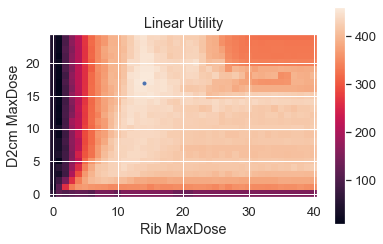

In [483]:
# Linear utility vs. parameters
Z = np.zeros_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        for index, row in result.goal_df.iterrows():
            Z[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear')
        k += 1
plt.imshow(Z.T, origin='lower')
idx = np.unravel_index(np.argmax(Z), Z.shape)
plt.plot(idx[0], idx[1], '.')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Utility')
plt.colorbar()
print(idx)

Text(0, 0.5, 'Rib')

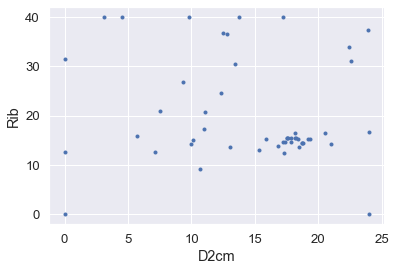

In [607]:
res_lin = np.load('bayes/res_linear_gp_minimize.pkl', allow_pickle=True)
res_d2cm = [row[0]/100 for row in res_lin.opt_result.x_iters]
res_rib = [row[1]/100 for row in res_lin.opt_result.x_iters]
plt.plot(res_d2cm, res_rib, '.')
plt.xlabel('D2cm')
plt.ylabel('Rib')

(14, 17)


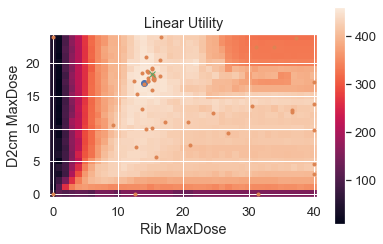

In [617]:
# Linear utility vs. parameters
Z = np.zeros_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        for index, row in result.goal_df.iterrows():
            Z[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear')
        k += 1
plt.imshow(Z.T, origin='lower')
idx = np.unravel_index(np.argmax(Z), Z.shape)
plt.plot(idx[0], idx[1], 'o')
plt.plot(res_rib, res_d2cm, '.')
plt.plot(res_lin.opt_result.x[1]/100, res_lin.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Utility')
plt.colorbar()
print(idx)

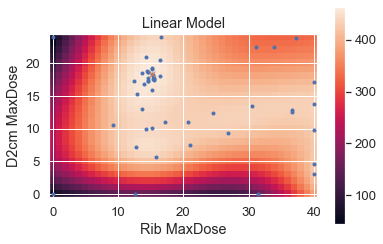

In [650]:
Z = np.zeros_like(X) # entries need to be normalized!
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        Z[jj, ii] = -res_lin.opt_result.models[-1].predict(np.array([d2cm[ii]/2400,rib[jj]/4000]).reshape(1, -1))[0]
plt.imshow(Z.T, origin='lower')
plt.plot(res_rib, res_d2cm, '.')
plt.plot(res_lin.opt_result.x[1]/100, res_lin.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Model')
plt.colorbar()
#plt.clim(0, 500)

(14, 17)


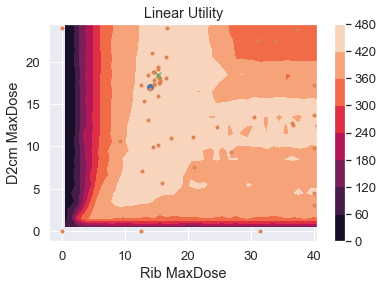

In [622]:
# Linear utility vs. parameters
Z = np.zeros_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        for index, row in result.goal_df.iterrows():
            Z[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear')
        k += 1
plt.contourf(Z.T, origin='lower')
idx = np.unravel_index(np.argmax(Z), Z.shape)
plt.plot(idx[0], idx[1], 'o')
plt.plot(res_rib, res_d2cm, '.')
plt.plot(res_lin.opt_result.x[1]/100, res_lin.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Utility')
plt.colorbar()
print(idx)

In [488]:
np.where(Z == 461)

(array([14]), array([17]))

In [609]:
res_lin.opt_result.fun

-465.9415740047698

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x149aae710>,
      dtype=object)

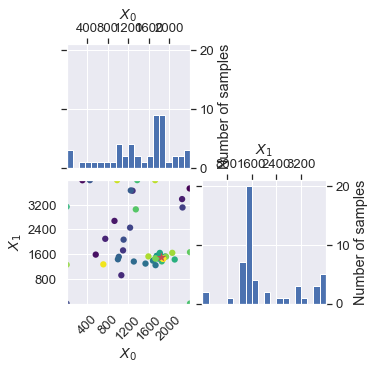

In [623]:
plots.plot_evaluations(res_lin.opt_result)

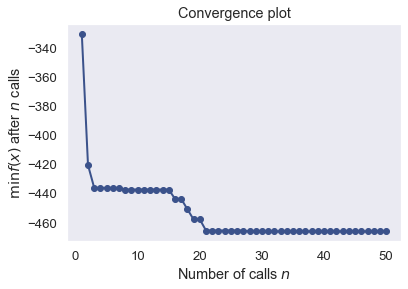

In [618]:
plots.plot_convergence(res_lin.opt_result)

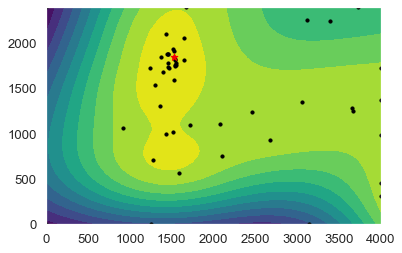

In [620]:
plots.plot_objective_2D(res_lin.opt_result, 1, 0)

In [611]:
res_lin.opt_result.x

[1841.633795327396, 1524.6179303089853]

Text(0, 0.5, 'Rib')

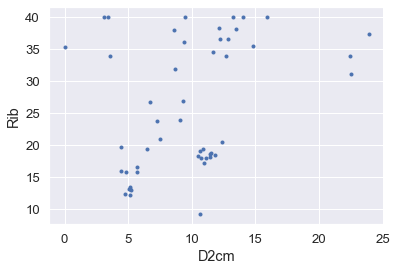

In [514]:
res_lq = np.load('bayes/res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)
res_d2cm = [row[0]/100 for row in res_lq.opt_result.x_iters]
res_rib = [row[1]/100 for row in res_lq.opt_result.x_iters]
plt.plot(res_d2cm, res_rib, '.')
plt.xlabel('D2cm')
plt.ylabel('Rib')

(13, 5)


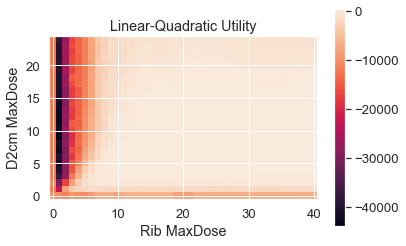

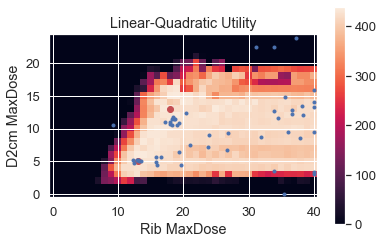

In [537]:
# Linear-quadratic utility vs. parameters
# Z = np.zeros_like(X)
# k = 0
# for ii in range(len(d2cm)):
#     for jj in range(len(rib)):
#         for index, row in result.goal_df.iterrows():
#             Z[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear_quadratic')
#         k += 1
plt.imshow(Z.T, origin='lower')
idx = np.unravel_index(np.argmax(Z), Z.shape)
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear-Quadratic Utility')
plt.colorbar()
#plt.clim([400,439])
print(idx)

plt.figure()
plt.imshow(Z.T, origin='lower')
idx = np.unravel_index(np.argmax(Z), Z.shape)
plt.plot(idx[0], idx[1], 'ro') # (13, 5)
plt.plot(18, 13, 'ro') # (18, 13) check correct
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear-Quadratic Utility')
plt.colorbar()
plt.plot(res_rib, res_d2cm, '.')
plt.clim([0,439])

In [499]:
Z[17:20,12:15]

array([[432, 434, 429],
       [431, 439, 401],
       [436, 423, 409]])

(13, 5)


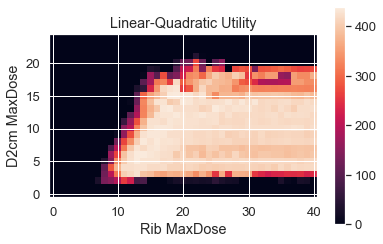

In [688]:
# Linear-quadratic utility vs. parameters (linear rib)
Z = np.zeros_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        for index, row in result.goal_df.iterrows():
            if 'Rib' in row['Roi']:
                Z[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear')
            else:
                Z[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear_quadratic')
        k += 1
plt.imshow(Z.T, origin='lower')
idx = np.unravel_index(np.argmax(Z), Z.shape)
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear-Quadratic Utility')
plt.colorbar()
plt.clim([0,439])
print(idx)

# This guy doesn't seem to have much difference with linear rib, because rib generally within linear region
# but maybe it changes the bayesian estimate of the function???

In [538]:
from skopt import plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x152d9fdd0>,
      dtype=object)

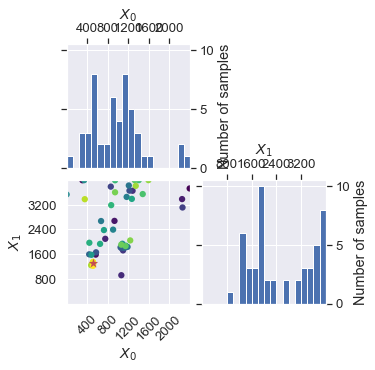

In [539]:
plots.plot_evaluations(res_lq.opt_result)

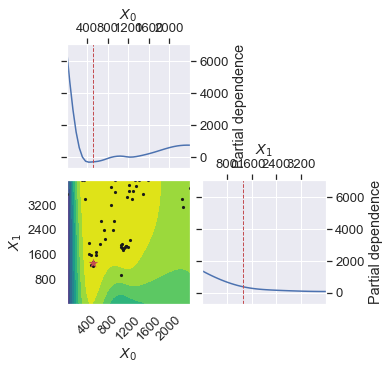

In [540]:
plots.plot_objective(res_lq.opt_result);

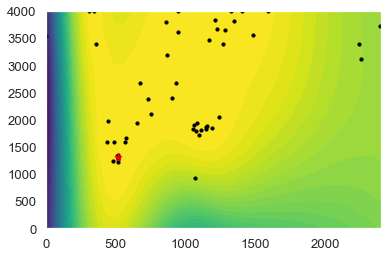

In [588]:
ax = plots.plot_objective_2D(res_lq.opt_result, 0, 1, levels=50)

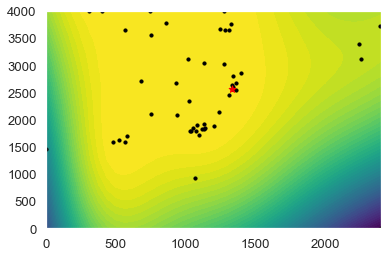

In [591]:
res_lrib = np.load('bayes/res_lin_rib_gp_minimize.pkl', allow_pickle=True)
ax = plots.plot_objective_2D(res_lrib.opt_result, 0, 1, levels=50)

(-450.0, -400.0)

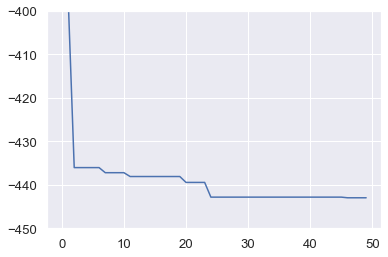

In [597]:
plt.plot(np.minimum.accumulate(res_lrib.opt_result.func_vals))
plt.ylim([-450,-400])

(-450.0, -400.0)

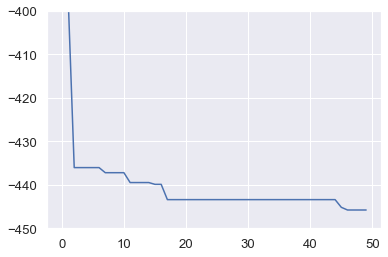

In [598]:
plt.plot(np.minimum.accumulate(res_lq.opt_result.func_vals))
plt.ylim([-450,-400])

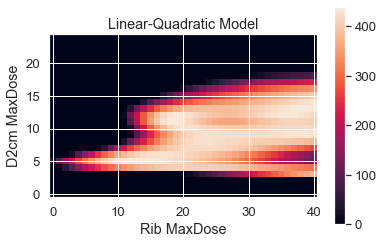

In [643]:
Z = np.zeros_like(X) # entries need to be normalized!
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        Z[jj, ii] = -res_lq.opt_result.models[-1].predict(np.array([d2cm[ii]/2400,rib[jj]/4000]).reshape(1, -1))[0]
plt.imshow(Z.T, origin='lower')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear-Quadratic Model')
plt.colorbar()
plt.clim([0, 439])

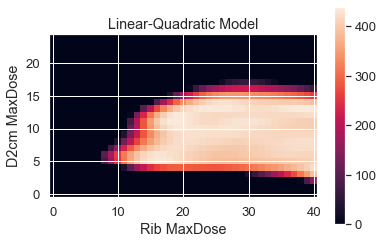

In [644]:
Z = np.zeros_like(X) # entries need to be normalized!
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        Z[jj, ii] = -res_lrib.opt_result.models[-1].predict(np.array([d2cm[ii]/2400,rib[jj]/4000]).reshape(1, -1))[0]
plt.imshow(Z.T, origin='lower')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear-Quadratic Model')
plt.colorbar()
plt.clim([0, 439])

In [629]:
res_lq.opt_result.models[-1].X_train_

array([[0.99718481, 0.93255736],
       [0.12812445, 0.99904052],
       [0.23608898, 0.39658073],
       [0.38791074, 0.66974604],
       [0.93553907, 0.84631092],
       [0.31327352, 0.52454816],
       [0.44345289, 0.22957721],
       [0.53441391, 0.91396202],
       [0.45720481, 0.43069857],
       [0.93912779, 0.77838924],
       [0.35802008, 0.94724903],
       [0.44610887, 0.44820433],
       [0.50938275, 0.91475567],
       [0.2385354 , 0.41512997],
       [0.43721544, 0.45540396],
       [0.46157609, 0.45046659],
       [0.18297989, 0.39879025],
       [0.47681644, 0.45487814],
       [0.49377967, 0.45922237],
       [0.50400678, 0.95663244],
       [0.27925531, 0.66850506],
       [0.48658603, 0.86389841],
       [0.37669971, 0.59886541],
       [0.        , 0.88378529],
       [0.14222083, 1.        ],
       [0.45183136, 0.48439052],
       [0.20121938, 0.39508648],
       [0.47991764, 0.46817882],
       [0.30257948, 0.59536971],
       [0.5285078 , 0.84807441],
       [0.

In [576]:
res_lq.opt_result.models[-1].predict(np.array([500, 1300]).reshape(1, -1))

array([-210.24805618])

In [532]:
np.max(Z)

439

In [518]:
res_lq.opt_result.x

[514.9057552630408, 1311.0270023120634]

In [516]:
res_lq.opt_result.fun

-445.79188684026605

In [482]:
np.where(Z == np.max(Z))

(array([13, 18]), array([ 5, 13]))

In [500]:
Z[12:15,4:7]

array([[425, 426, 424],
       [427, 439, 438],
       [427, 429, 438]])

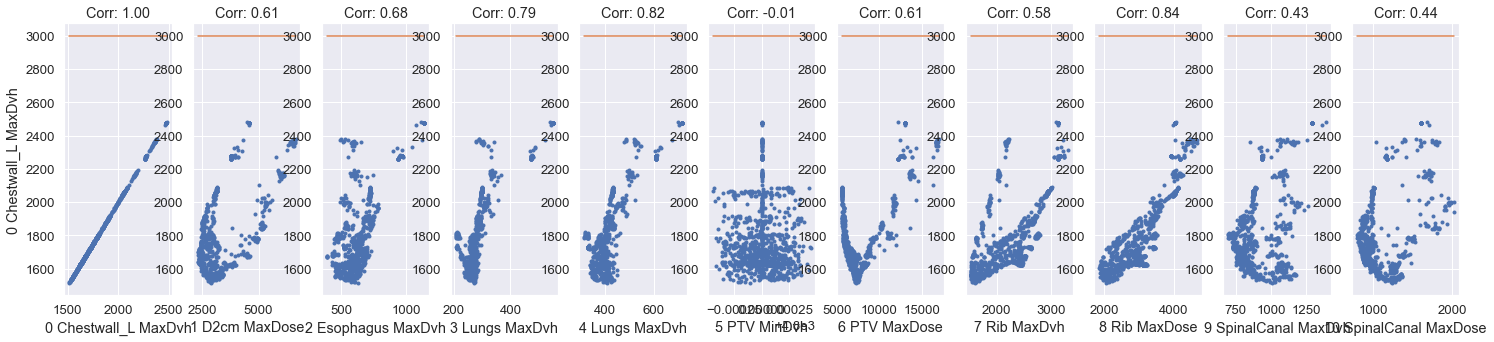

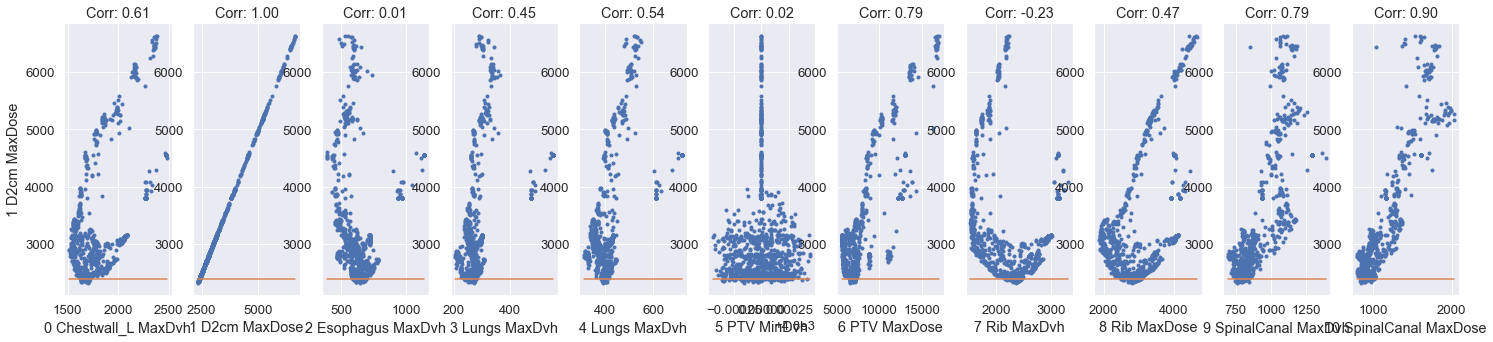

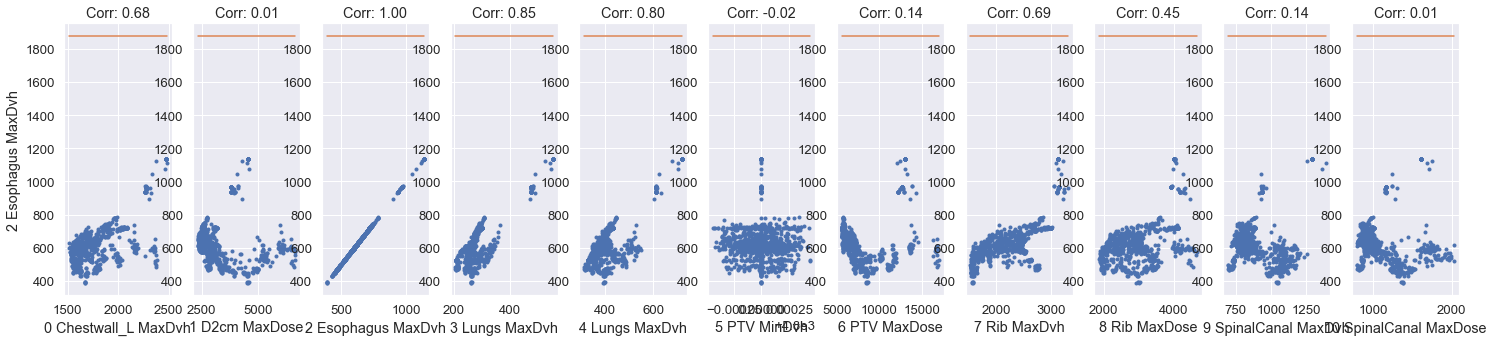

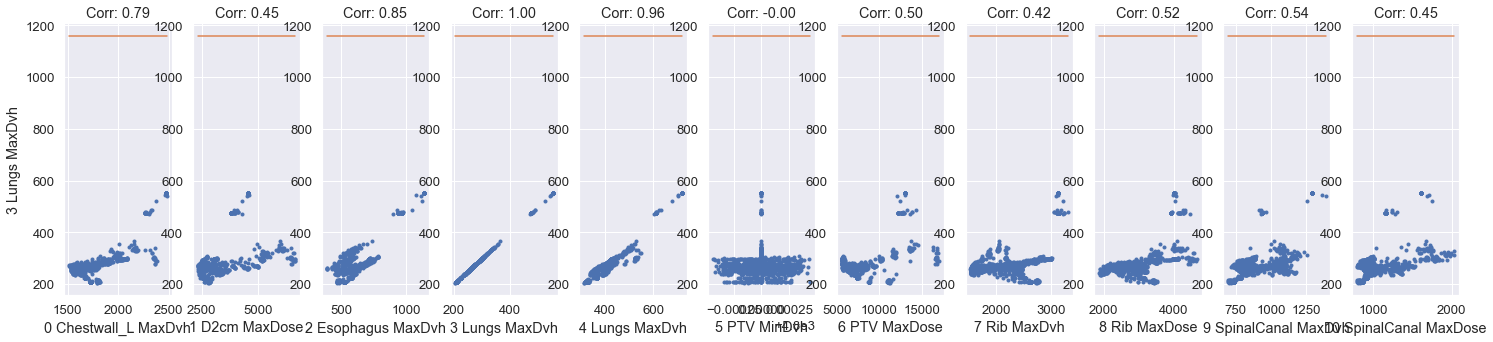

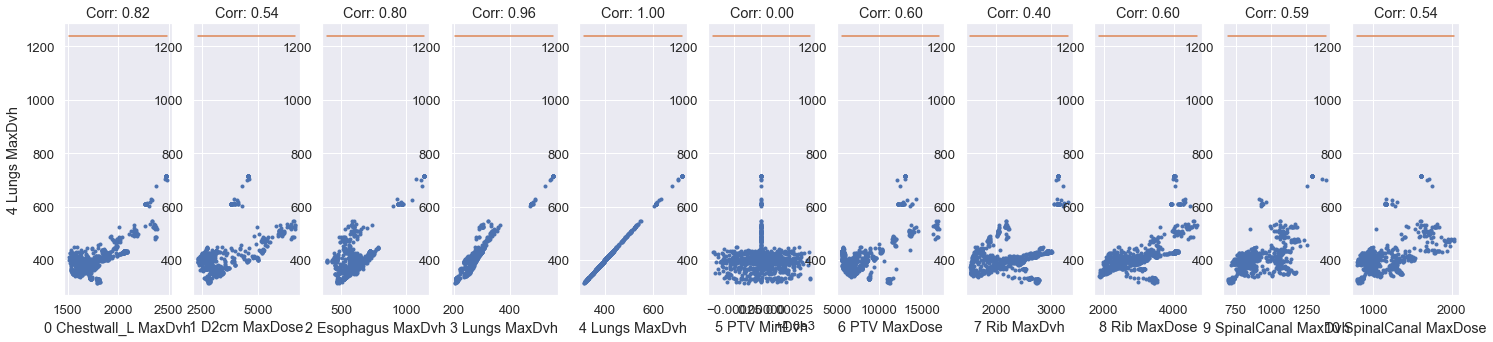

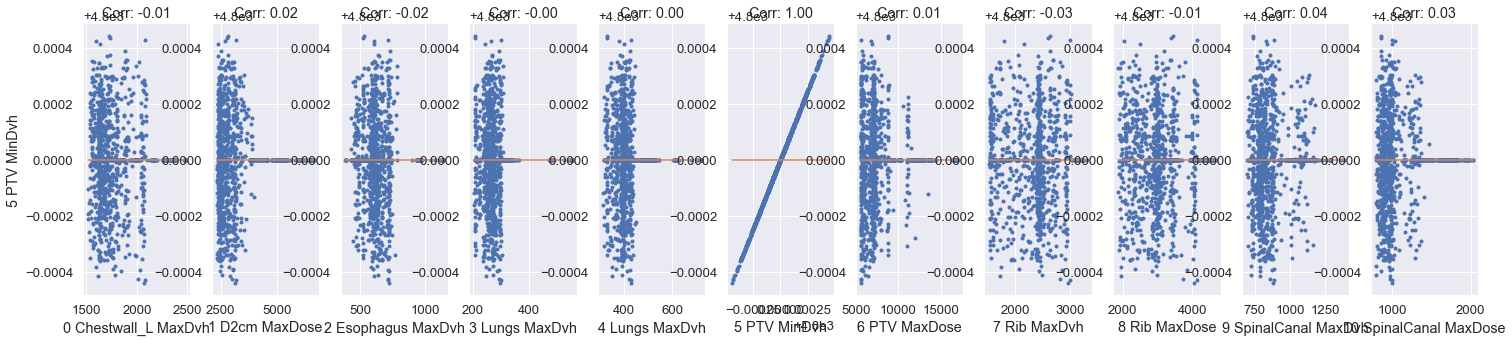

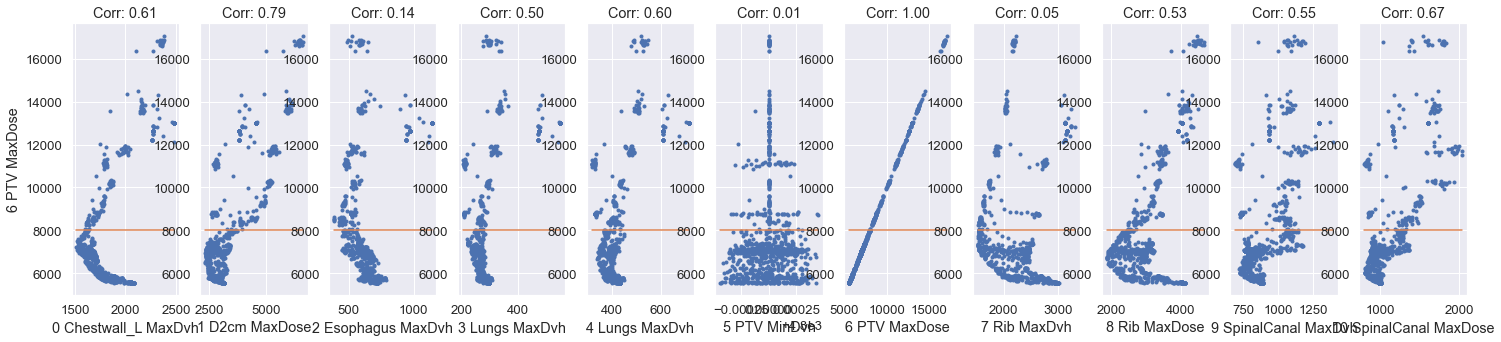

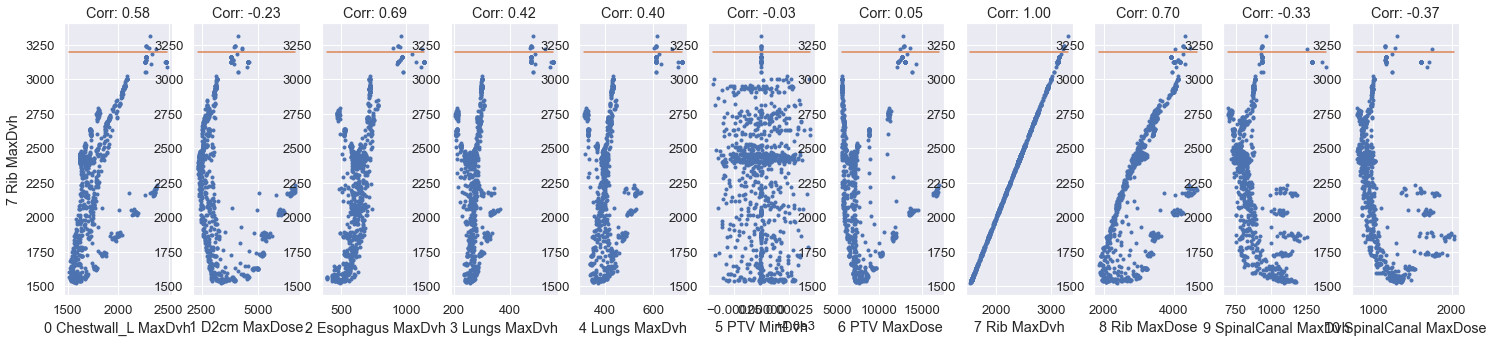

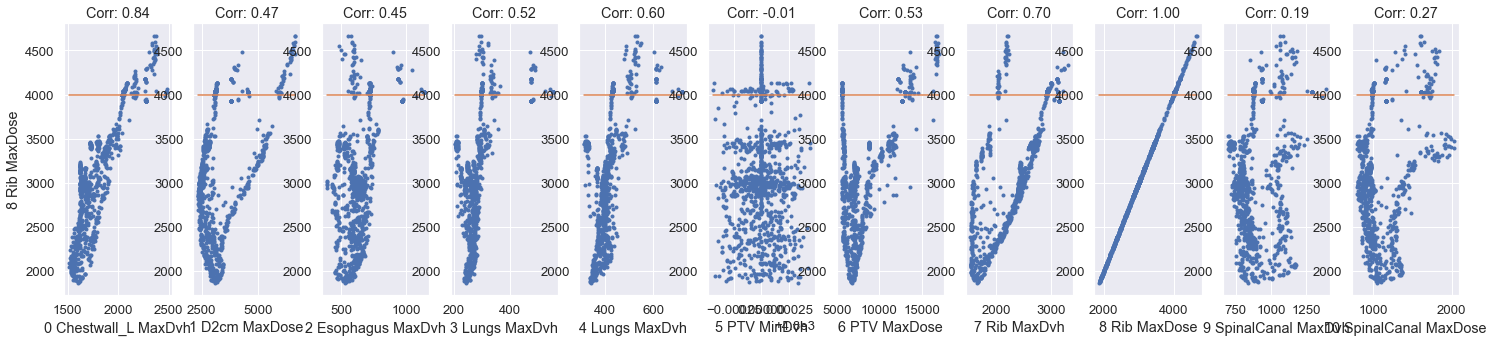

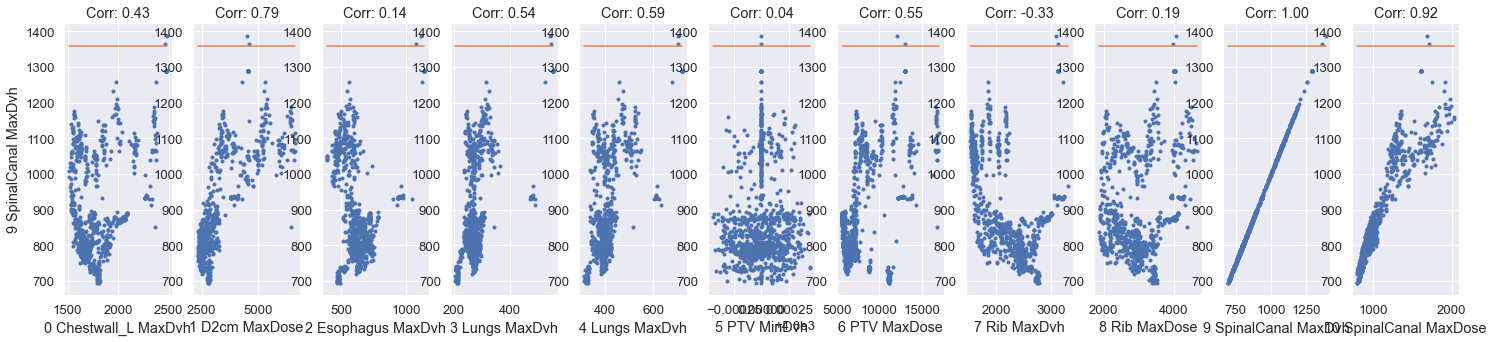

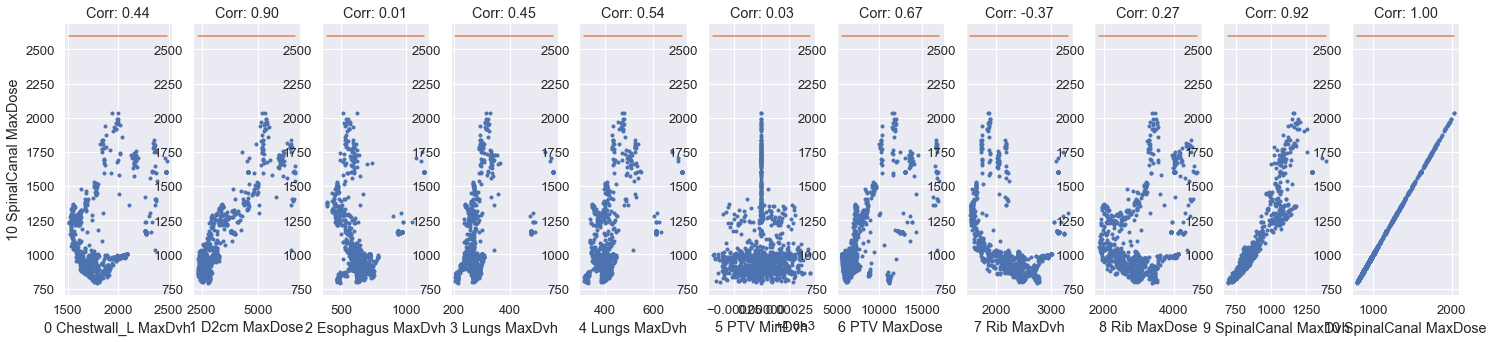

In [501]:
analyze.scatterplot(result.goal_df, goal_dict) # maybe plot vertical line for x-axis goal level?

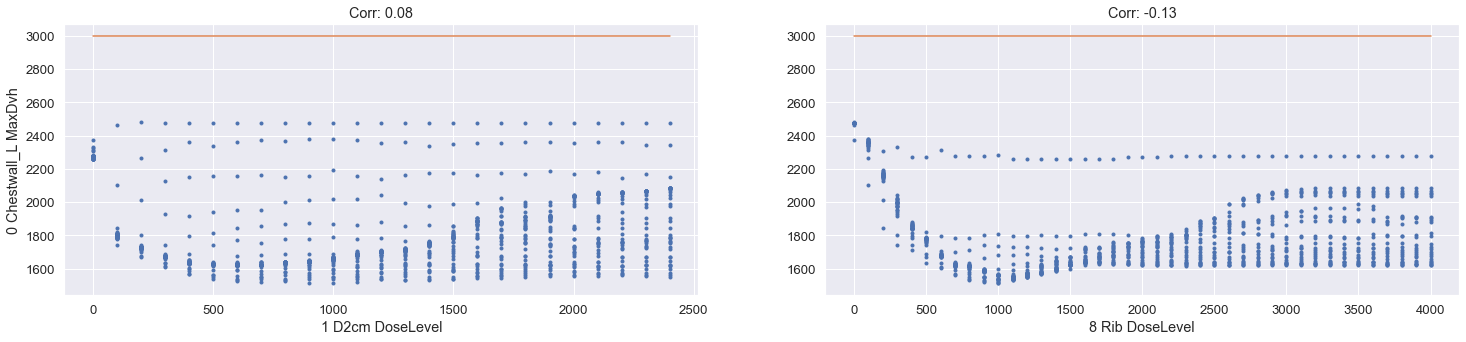

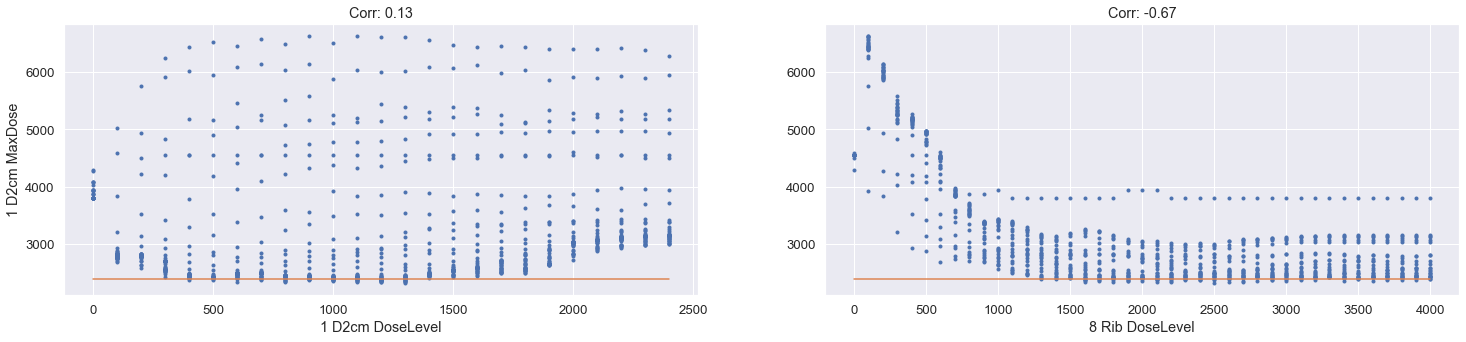

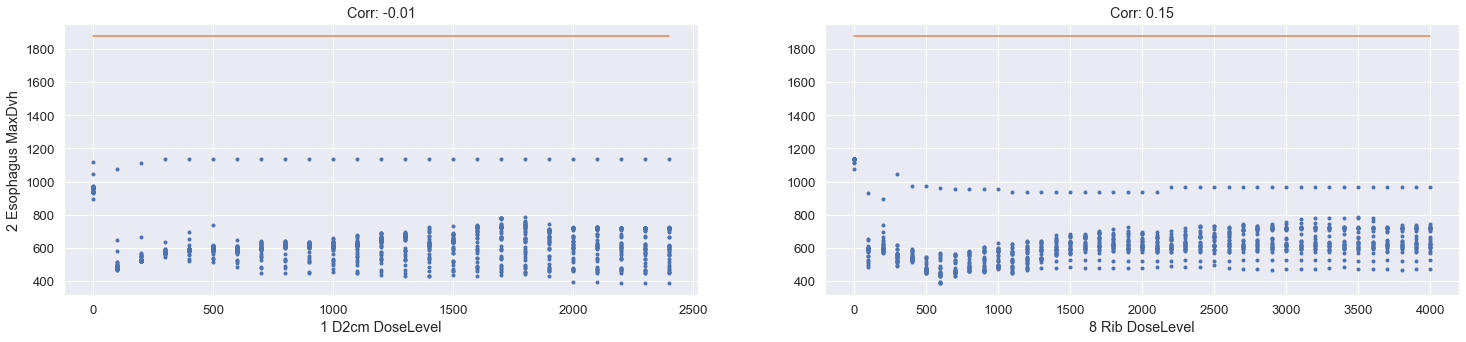

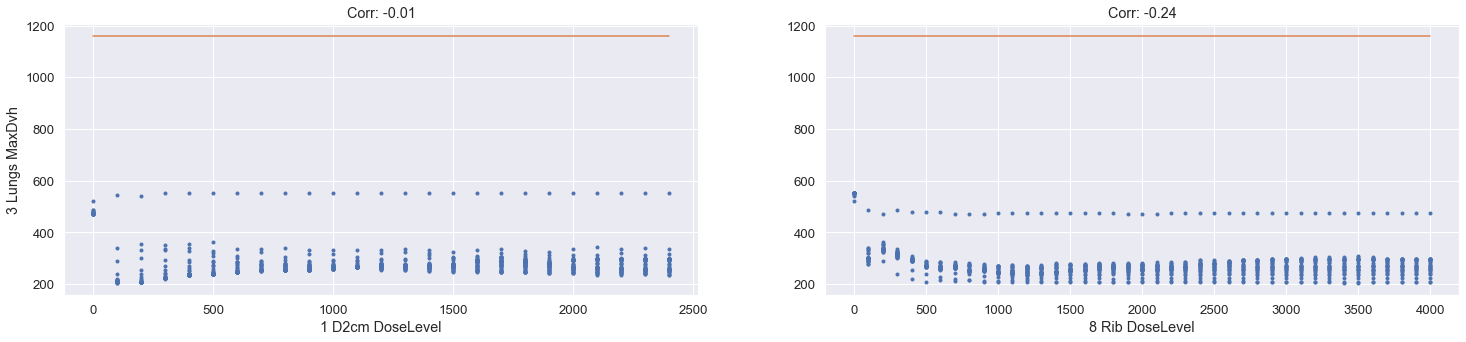

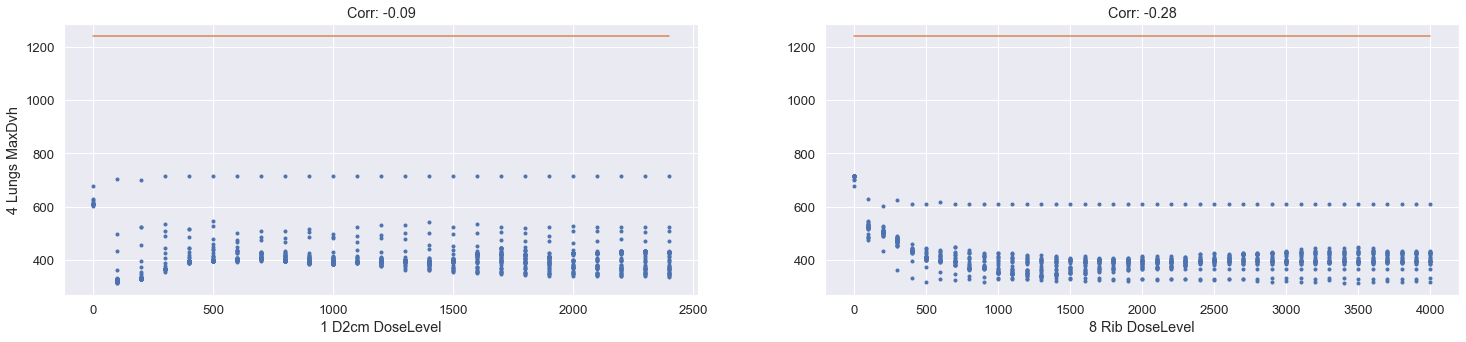

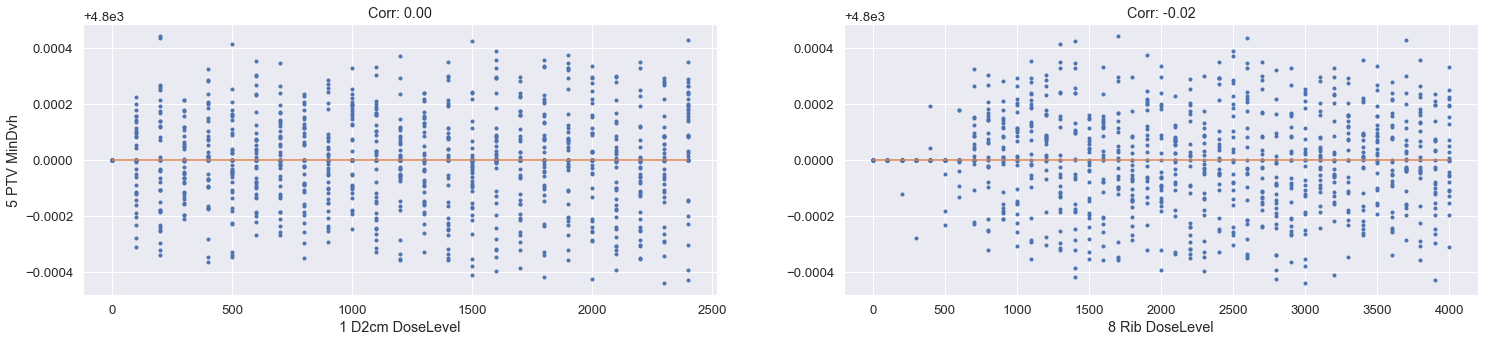

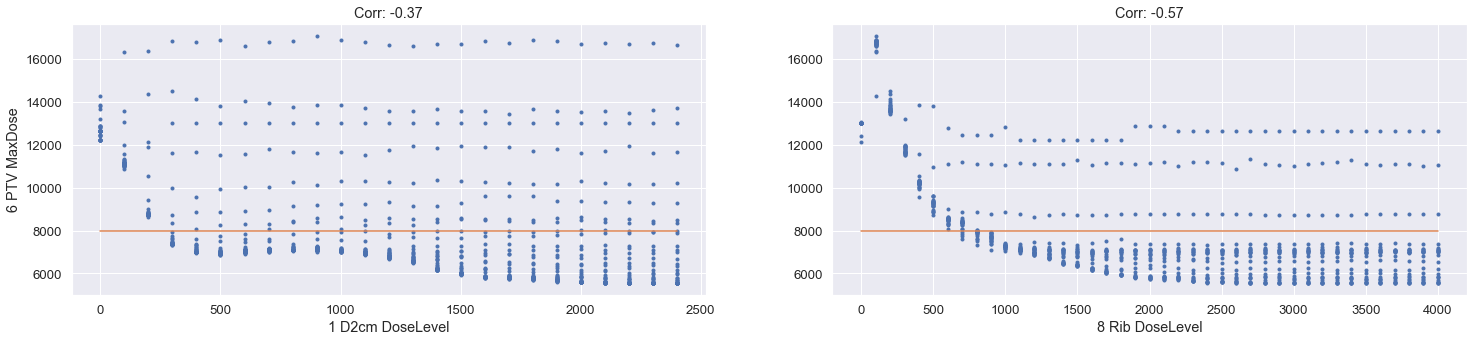

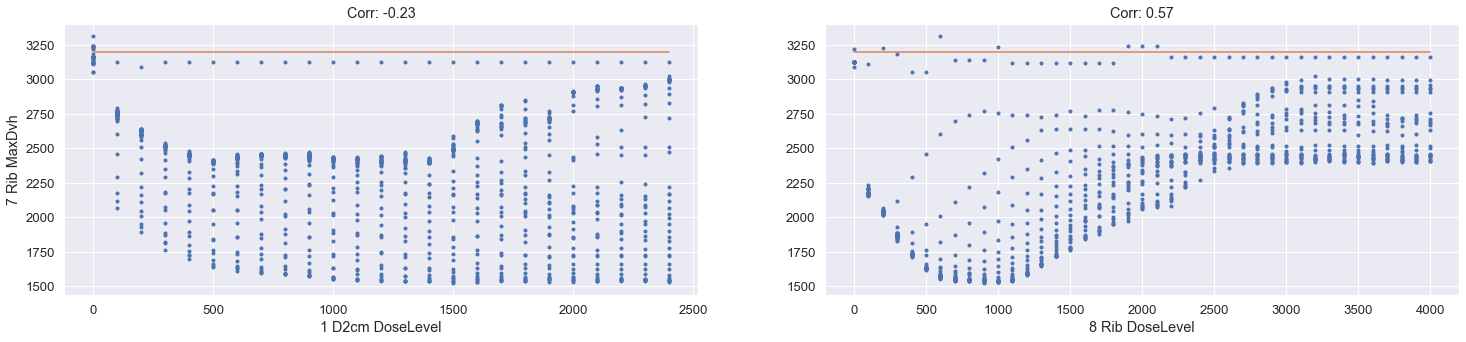

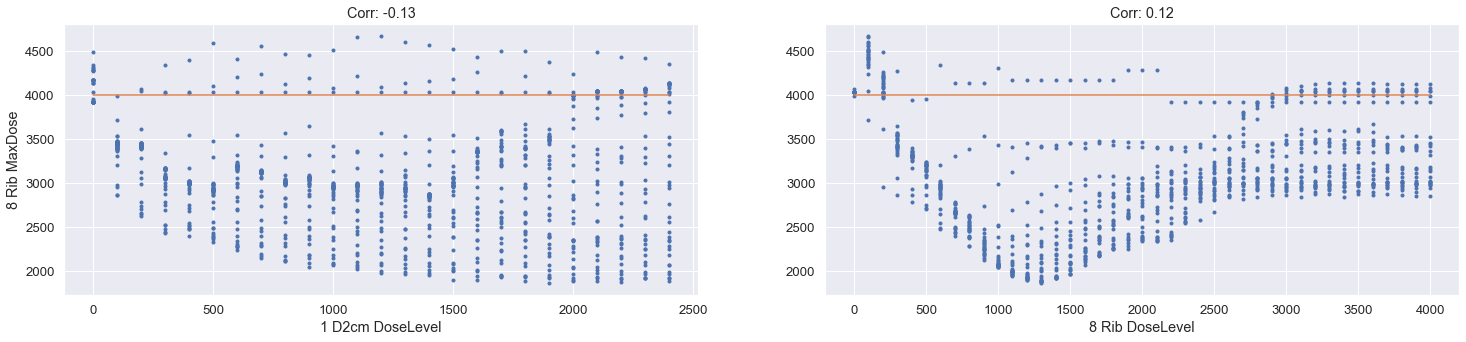

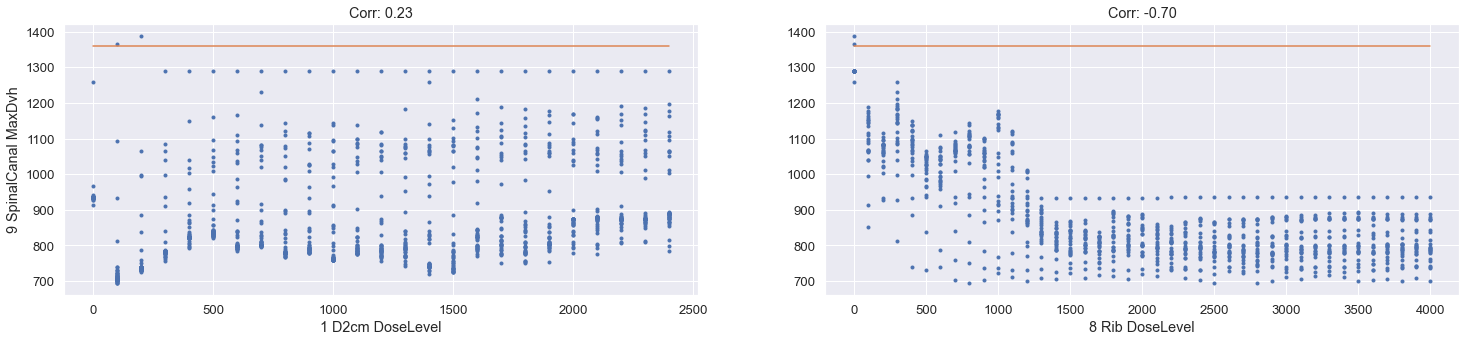

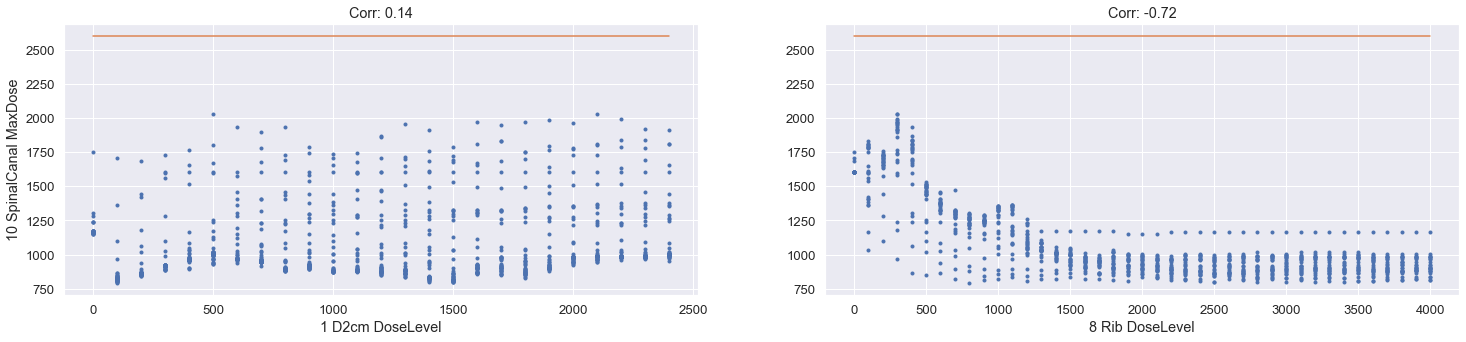

In [502]:
analyze.scatterplot(result.goal_df, goal_dict, result.func_df, x_iters)

In [ ]:
# Might be nice to color the points based on parameter or flag values!

In [ ]:
# Plot iterates on real plots
# Plot iterates on corresponding model

# Do this for linear, linear-quadratic, linear-quadratic with linear rib
# Do this for dummy, bayes, forest

# Question: In the paper, do I show all of these results? Or just some? (i.e., linear rib)
# Could start with simple (linear), show convergence works pretty well
# then notice that we didn't meet the D2cm, so introduce linear-quadratic (do I then show grid?)
# Issue with linear rib is that the objective is actually the same, but the estimate gets
# skewed by the different values on the boundaries...

# Linear Model

In [657]:
res_lin_gp = np.load('bayes/res_linear_gp_minimize.pkl', allow_pickle=True)
res_lin_dummy = np.load('bayes/res_linear_dummy_minimize.pkl', allow_pickle=True)
res_lin_forest = np.load('bayes/res_linear_forest_minimize.pkl', allow_pickle=True)

In [ ]:
# Linear utility vs. parameters
Z_lin = np.zeros_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        for index, row in result.goal_df.iterrows():
            Z_lin[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear')
        k += 1

## Dummy Minimize

Grid: (14, 17), Dummy: [2141.126092804515, 1510.3373646043788]
Grid: 461, Dummy: -450.99699332837065


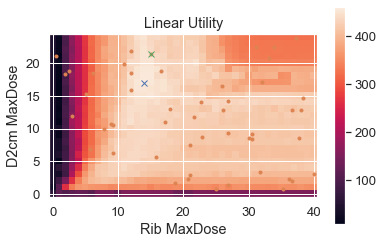

In [670]:
d2cm_dummy = [row[0]/100 for row in res_lin_dummy.opt_result.x_iters]
rib_dummy = [row[1]/100 for row in res_lin_dummy.opt_result.x_iters]

plt.imshow(Z_lin.T, origin='lower')
idx = np.unravel_index(np.argmax(Z_lin), Z_lin.shape)
plt.plot(idx[0], idx[1], 'x')
plt.plot(rib_dummy, d2cm_dummy, '.')
plt.plot(res_lin_dummy.opt_result.x[1]/100, res_lin_dummy.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Utility')
plt.colorbar()

print(f'Grid: {idx}, Dummy: {res_lin_dummy.opt_result.x}')
print(f'Grid: {np.max(Z_lin)}, Dummy: {res_lin_dummy.opt_result.fun}')

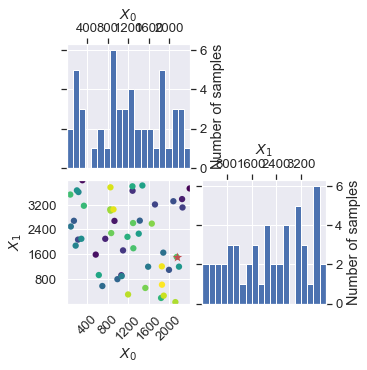

In [668]:
plots.plot_evaluations(res_lin_dummy.opt_result);

## Bayes Minimize

Grid: (14, 17), Dummy: [1841.633795327396, 1524.6179303089853]
Grid: 461, Dummy: -465.9415740047698


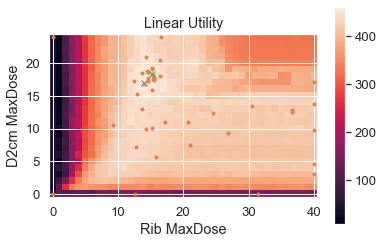

In [671]:
d2cm_gp = [row[0]/100 for row in res_lin_gp.opt_result.x_iters]
rib_gp = [row[1]/100 for row in res_lin_gp.opt_result.x_iters]

plt.imshow(Z_lin.T, origin='lower')
idx = np.unravel_index(np.argmax(Z_lin), Z_lin.shape)
plt.plot(idx[0], idx[1], 'x')
plt.plot(rib_gp, d2cm_gp, '.')
plt.plot(res_lin_gp.opt_result.x[1]/100, res_lin_gp.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Utility')
plt.colorbar()

print(f'Grid: {idx}, Dummy: {res_lin_gp.opt_result.x}')
print(f'Grid: {np.max(Z_lin)}, Dummy: {res_lin_gp.opt_result.fun}')

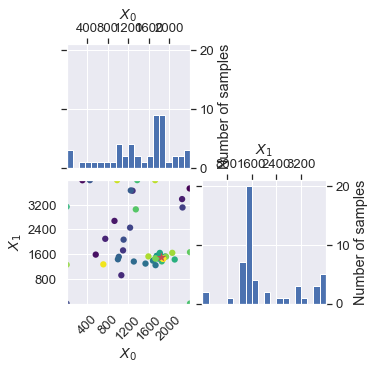

In [673]:
plots.plot_evaluations(res_lin_gp.opt_result);

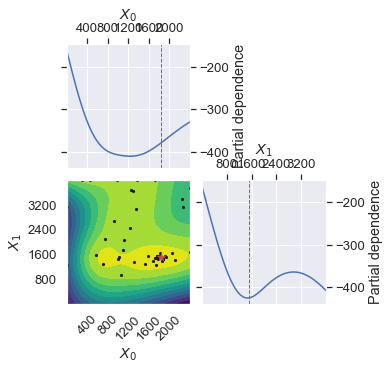

In [675]:
plots.plot_objective(res_lin_gp.opt_result);

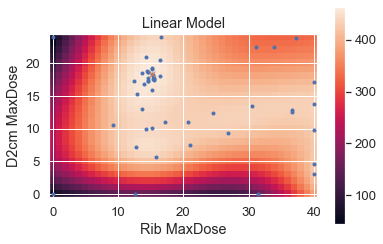

In [683]:
Z_gp = np.zeros_like(X) # entries need to be normalized!
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        Z_gp[jj, ii] = -res_lin_gp.opt_result.models[-1].predict(np.array([d2cm[ii]/2400,rib[jj]/4000]).reshape(1, -1))[0]
plt.imshow(Z_gp.T, origin='lower')
plt.plot(rib_gp, d2cm_gp, '.')
plt.plot(res_lin_gp.opt_result.x[1]/100, res_lin_gp.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Model')
plt.colorbar()

## Forest Minimize

Grid: (14, 17), Dummy: [1785.2027201900478, 1719.1881728919543]
Grid: 461, Dummy: -463.2608197362764


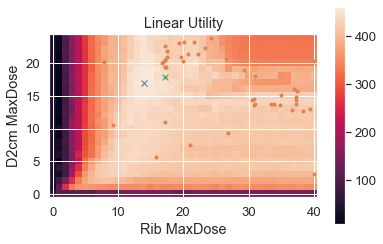

In [678]:
d2cm_forest = [row[0]/100 for row in res_lin_forest.opt_result.x_iters]
rib_forest = [row[1]/100 for row in res_lin_forest.opt_result.x_iters]

plt.imshow(Z_lin.T, origin='lower')
idx = np.unravel_index(np.argmax(Z_lin), Z_lin.shape)
plt.plot(idx[0], idx[1], 'x')
plt.plot(rib_forest, d2cm_forest, '.')
plt.plot(res_lin_forest.opt_result.x[1]/100, res_lin_forest.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Utility')
plt.colorbar()

print(f'Grid: {idx}, Dummy: {res_lin_forest.opt_result.x}')
print(f'Grid: {np.max(Z_lin)}, Dummy: {res_lin_forest.opt_result.fun}')

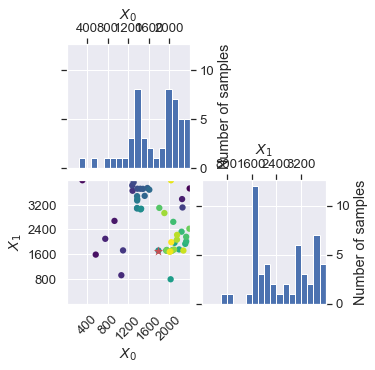

In [681]:
plots.plot_evaluations(res_lin_forest.opt_result);

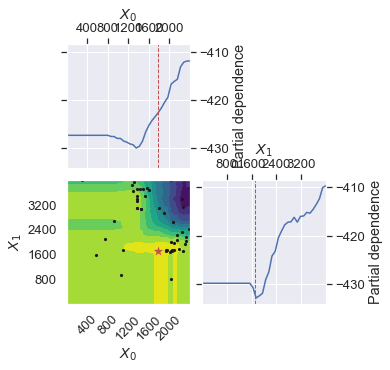

In [682]:
plots.plot_objective(res_lin_forest.opt_result);

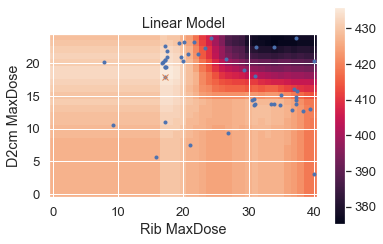

In [686]:
Z_forest = np.zeros_like(X) # entries need to be normalized? doesn't seem like it for forest...
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        Z_forest[jj, ii] = -res_lin_forest.opt_result.models[-1].predict(np.array([d2cm[ii],rib[jj]]).reshape(1, -1))[0]
plt.imshow(Z_forest.T, origin='lower')
plt.plot(rib_forest, d2cm_forest, '.')
plt.plot(res_lin_forest.opt_result.x[1]/100, res_lin_forest.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Model')
plt.colorbar()

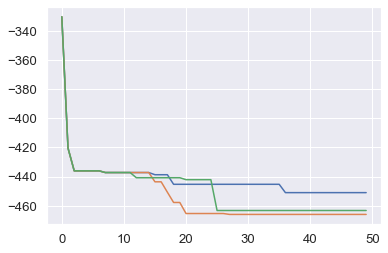

In [705]:
plt.plot(np.minimum.accumulate(res_lin_dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(res_lin_gp.opt_result.func_vals))
plt.plot(np.minimum.accumulate(res_lin_forest.opt_result.func_vals))

# Linear-Quadratic Model

In [692]:
res_lq_gp = np.load('bayes/res_linear_quadratic_gp_minimize.pkl', allow_pickle=True)

In [690]:
# Linear-quadratic utility vs. parameters
Z_lq = np.zeros_like(X)
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        for index, row in result.goal_df.iterrows():
            Z_lq[jj, ii] += raybay.get_term(goal_dict[index][k], row['AcceptanceLevel'], row['Type'], 'linear_quadratic')
        k += 1

## Dummy Minimize

(13, 5)
Grid: (13, 5), Dummy: (22.636481098567728, 14.025338897710304)
Grid: 461, Dummy: 442.3205878040704


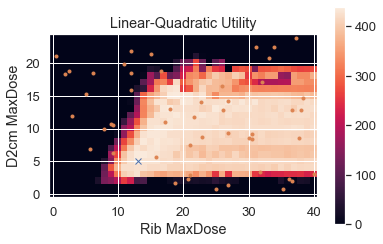

In [708]:
plt.imshow(Z_lq.T, origin='lower')
idx = np.unravel_index(np.argmax(Z_lq), Z_lq.shape)
plt.plot(idx[0], idx[1], 'x')
plt.plot(rib_dummy, d2cm_dummy, '.')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear-Quadratic Utility')
plt.colorbar()
plt.clim([0,439])
print(idx)

vals = np.zeros_like(rib_dummy)
for ii in range(len(rib_dummy)):
    for index, row in result.goal_df.iterrows():
        vals[ii] += raybay.get_term(res_lin_dummy.goal_dict[index][ii], row['AcceptanceLevel'], row['Type'], 'linear_quadratic')


print(f'Grid: {idx}, Dummy: {rib_dummy[np.argmax(vals)], d2cm_dummy[np.argmax(vals)]}')
print(f'Grid: {np.max(Z_lin)}, Dummy: {max(vals)}')

## Bayes Minimize

Grid: (13, 5), Dummy: [514.9057552630408, 1311.0270023120634]
Grid: 439, Dummy: -445.79188684026605


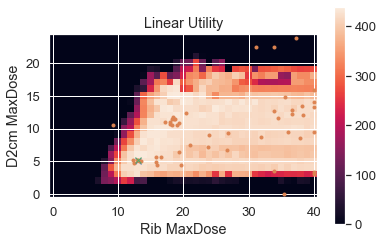

In [696]:
d2cm_gp = [row[0]/100 for row in res_lq_gp.opt_result.x_iters]
rib_gp = [row[1]/100 for row in res_lq_gp.opt_result.x_iters]

plt.imshow(Z_lq.T, origin='lower')
idx = np.unravel_index(np.argmax(Z_lq), Z_lq.shape)
plt.plot(idx[0], idx[1], 'x')
plt.plot(rib_gp, d2cm_gp, '.')
plt.plot(res_lq_gp.opt_result.x[1]/100, res_lq_gp.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Utility')
plt.colorbar()
plt.clim([0,439])

print(f'Grid: {idx}, Dummy: {res_lq_gp.opt_result.x}')
print(f'Grid: {np.max(Z_lq)}, Dummy: {res_lq_gp.opt_result.fun}')

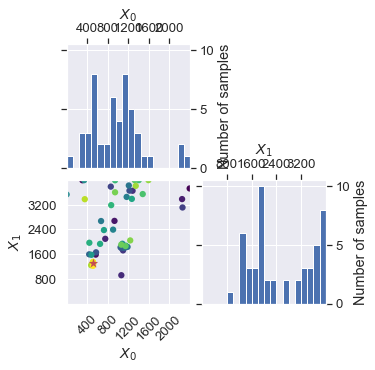

In [699]:
plots.plot_evaluations(res_lq_gp.opt_result);

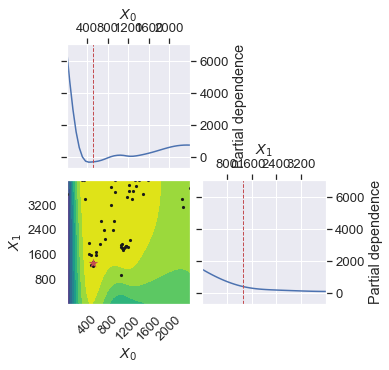

In [700]:
plots.plot_objective(res_lq_gp.opt_result);

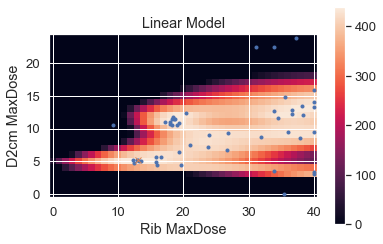

In [702]:
Z_gp = np.zeros_like(X) # entries need to be normalized!
k = 0
for ii in range(len(d2cm)):
    for jj in range(len(rib)):
        Z_gp[jj, ii] = -res_lq_gp.opt_result.models[-1].predict(np.array([d2cm[ii]/2400,rib[jj]/4000]).reshape(1, -1))[0]
plt.imshow(Z_gp.T, origin='lower')
plt.plot(rib_gp, d2cm_gp, '.')
plt.plot(res_lq_gp.opt_result.x[1]/100, res_lq_gp.opt_result.x[0]/100,'x')
plt.xlabel('Rib MaxDose')
plt.ylabel('D2cm MaxDose')
plt.title('Linear Model')
plt.colorbar()
plt.clim([0,439])

(-450.0, -430.0)

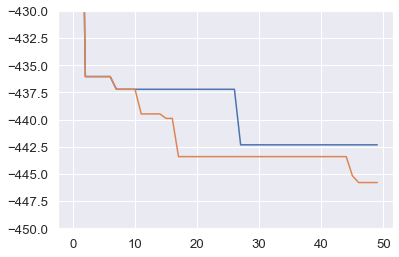

In [714]:
plt.plot(np.minimum.accumulate(-vals))
plt.plot(np.minimum.accumulate(res_lq_gp.opt_result.func_vals))
plt.ylim([-450, -430])